<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/Voting_Classifier_on_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
train_df = pd.read_csv('/content/train (6).csv')
test_df = pd.read_csv('/content/test (7).csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


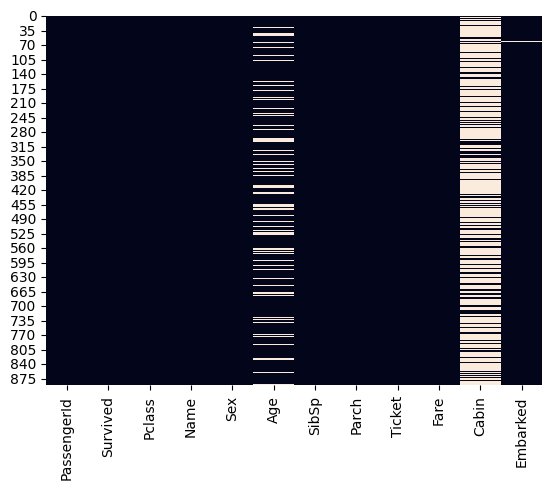

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [5]:
sns.heatmap(train_df.isnull(),cbar=False)
plt.show()
print(train_df.describe())

In [14]:
target = 'Survived'
X = train_df.drop(target, axis=1)
y = train_df[target]

num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)


In [15]:
log_clf = LogisticRegression(max_iter=500)
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=200)

In [16]:
voting_clf_hard = VotingClassifier(
    estimators=[('lr',log_clf),('dt',dt_clf),('knn',knn_clf)],
    voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[('lr',log_clf),('dt',dt_clf),('knn',knn_clf)],
    voting='soft'
)

In [17]:
for clf in (log_clf, dt_clf, knn_clf, rf_clf, voting_clf_hard, voting_clf_soft):
    clf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', clf)])
    clf_pipe.fit(X, y)
    preds = clf_pipe.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, preds))

LogisticRegression 0.8125701459034792
DecisionTreeClassifier 0.9797979797979798
KNeighborsClassifier 0.8653198653198653
RandomForestClassifier 0.9797979797979798
VotingClassifier 0.8945005611672279
VotingClassifier 0.9393939393939394


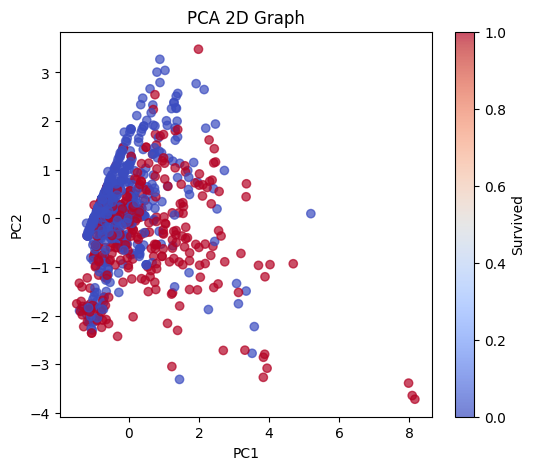

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_transformed = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed.toarray())

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Graph')
plt.colorbar(label='Survived')
plt.show()
